In [1]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")  # use your actual filename
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Show basic info
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [4]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


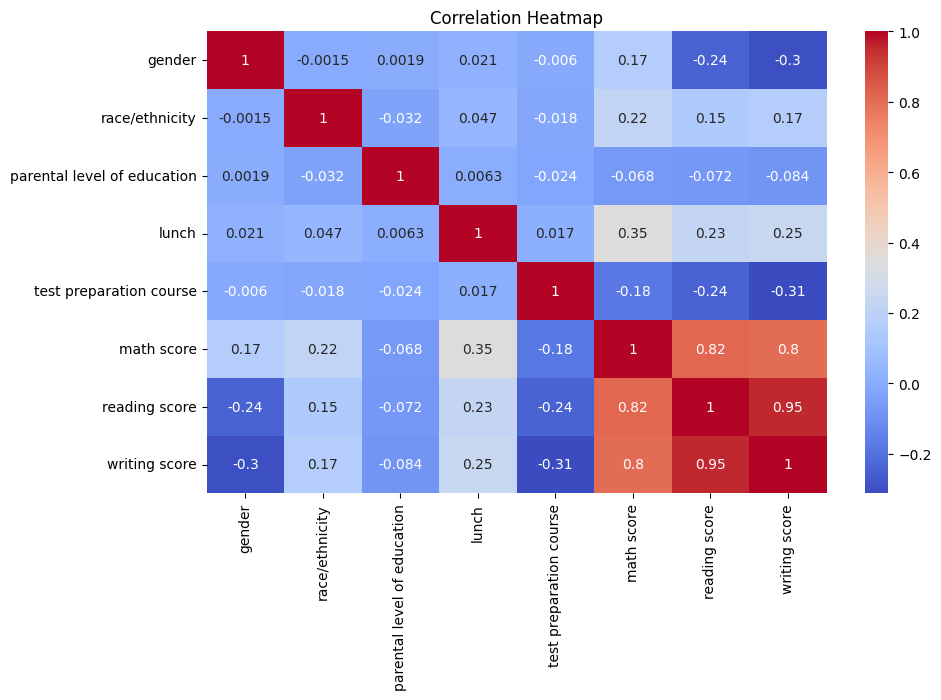

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


R² Score: 0.8838026201112223
MAE: 4.1301450780040545
RMSE: 5.317450940660133


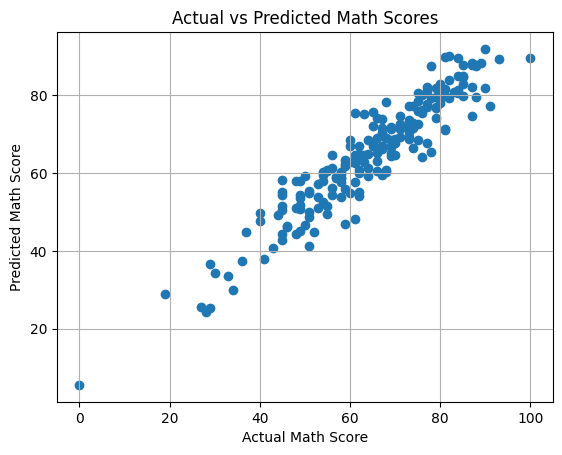

In [9]:
# Import NumPy (required for RMSE calculation)
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
X = df_encoded.drop(['math score'], axis=1)
y = df_encoded['math score']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot predicted vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()


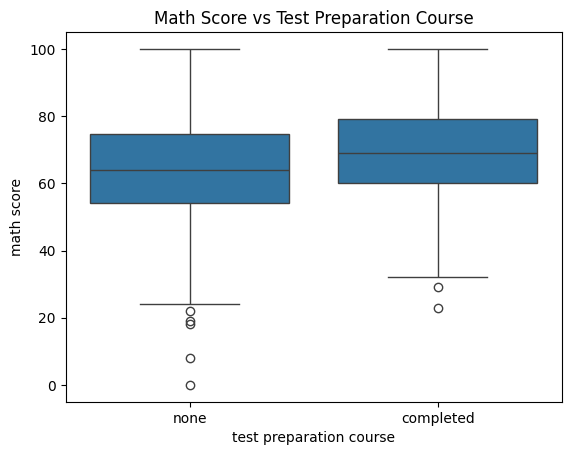

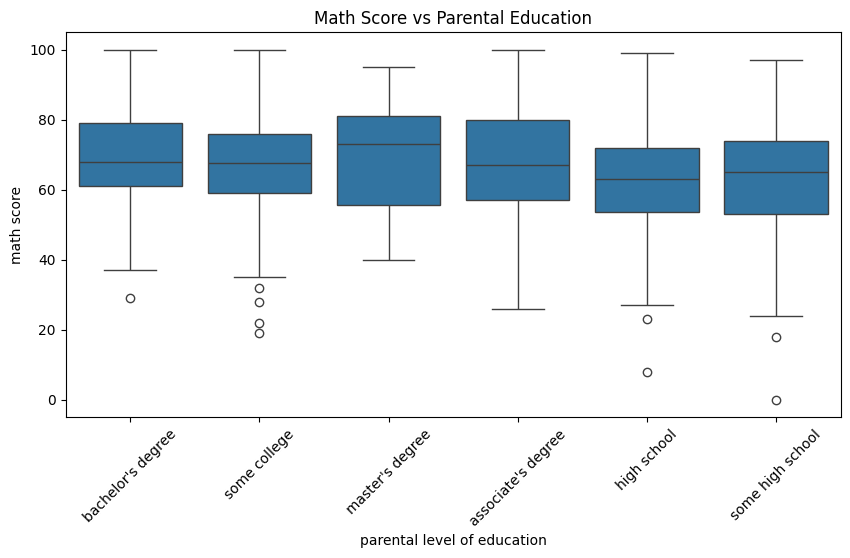

In [10]:
import seaborn as sns

# Boxplot: Test preparation vs math score
sns.boxplot(data=df, x='test preparation course', y='math score')
plt.title("Math Score vs Test Preparation Course")
plt.show()

# Boxplot: Parental education vs math score
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='parental level of education', y='math score')
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()


In [11]:
# Loop through genders and create separate models
for gender in df['gender'].unique():
    sub_df = df[df['gender'] == gender].copy()

    # Re-encode categorical columns
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
        sub_df[col] = le.fit_transform(sub_df[col])

    # Define features and target
    X = sub_df.drop('math score', axis=1)
    y = sub_df['math score']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nGender: {gender}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Gender: female
R² Score: 0.8985617149131111
MAE: 4.5640534359284475
RMSE: 5.520525554983

Gender: male
R² Score: 0.8571708797073345
MAE: 4.397809154480235
RMSE: 5.325793945683686
